### Introducción a GeoPandas en Jupyter Notebook
#### Usando Visual Studio Code

Usamos 3 geodataframes locales con información real y actualizada. Estudiamos la carga de bibliotecas, lectura y carga de archivos en tablas, ploteo de mapas temáticos y sus ajustes, creación de geometrías, agrupamiento de datos y unión de bases de datos.

In [1]:
# importar la librería de geopandas con su alias
import geopandas as gpd

In [2]:
# importar la librería de pandas con su alias
import pandas as pd

In [3]:
# importar la librería de matplotlib con su alias
import matplotlib.pyplot as plt

In [4]:
# cargar los geodataframe desde su directorio
barrios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\GeoPandasOptimizado\5344\barrios.shp")
radios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\GeoPandasOptimizado\5344\radios.shp")
union_2 = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\proyecto_avanzado\union2\union2.shp")

In [5]:
# imprimir la cabecera de la tabla
barrios.head(2)

,nombre,zona,aream2,areaha,pob2010,viv2010,pob2021,viv2021,geometry
0,9 de Julio,Sur,220906.7,22.1,1513.0,378.0,1432.0,NaN,"POLYGON Z ((2616321.841 4919953.509 0.000, 261..."
1,13 de Diciembre,Sur,211834.8,21.2,1311.0,328.0,1373.0,416.0,"POLYGON Z ((2616303.427 4918885.817 0.000, 261..."


In [6]:
# imprimir la cabecera de la tabla
radios.head(2)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,geometry
0,1.983407e+06,9684.930,26,021,07,01,U,260210701,329.0,123.0,None,"POLYGON ((2616543.465 4934097.157, 2616540.215..."
1,3.937996e+07,46229.258,26,021,09,01,M,260210901,294.0,132.0,None,"POLYGON ((2619367.965 4934195.657, 2622752.465..."


In [7]:
# imprimir la cabecera de la tabla
union_2.head(2)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,nombre_2,zona,geometry
0,1.983407e+06,9684.930,26,021,07,01,U,260210701,329.0,123.0,None,Astra,Norte,"POLYGON ((2616543.465 4934097.157, 2616540.215..."
1,3.937996e+07,46229.258,26,021,09,01,M,260210901,294.0,132.0,None,Don Bosco,Norte,"POLYGON ((2619367.965 4934195.657, 2622752.465..."


In [8]:
# crear el área y su respectivo campo a cada geodataframe
barrios["area"] = barrios.area
radios["area"] = radios.area
union_2["area"] = union_2.area

<Axes: >

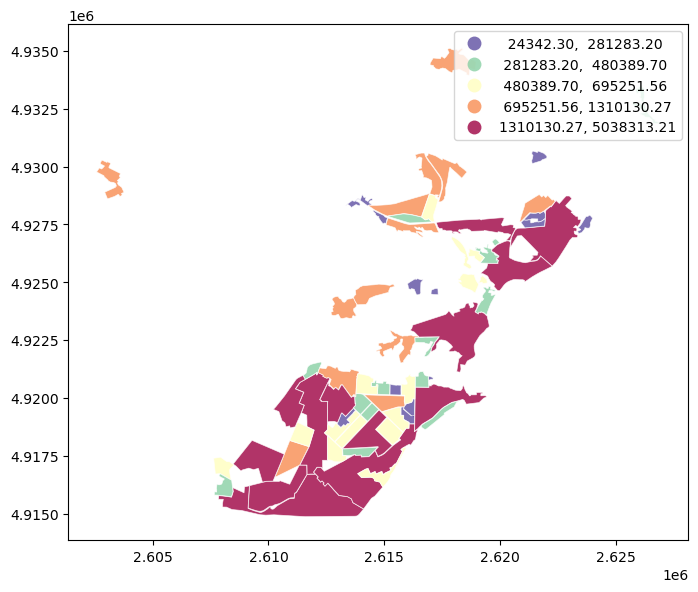

In [9]:
## plotear el geodataframe (en orden) y editar features
barrios.plot("area",
            legend = True,
            linewidth = 0.5,
            edgecolor = "white",
            scheme = "quantiles",
            cmap = "Spectral_r",
            alpha = 0.8,
            figsize = (8, 8))

<Axes: >

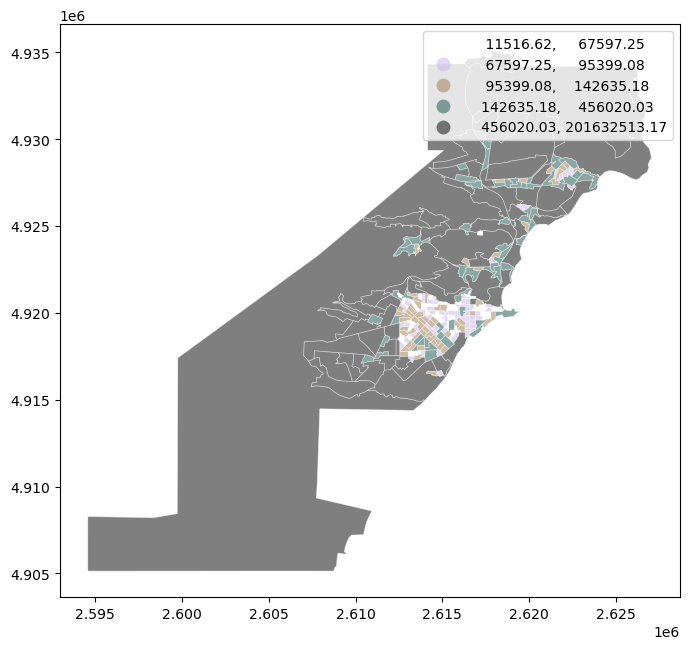

In [10]:
# plotear el geodataframe (en orden) y editar features
radios.plot("area",
            legend = True,
            linewidth = 0.5,
            edgecolor = "white",
            scheme = "quantiles",
            cmap = "cubehelix_r",
            alpha = 0.5,
            figsize = (8, 8))

<Axes: >

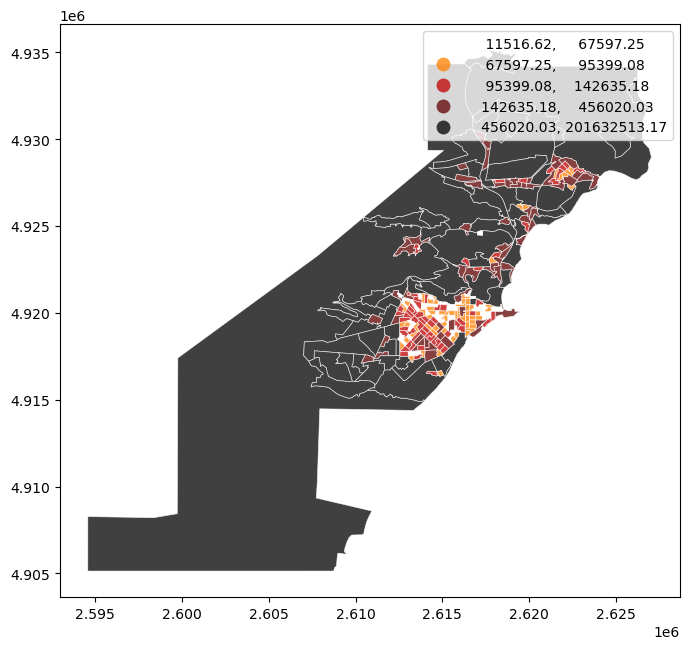

In [11]:
# plotear el geodataframe (en orden) y editar features
union_2.plot("area",
           legend = True,
           linewidth = 0.5,
           edgecolor = "white",
           scheme = "quantiles",
           cmap = "gist_heat_r",
           alpha = 0.75,
           figsize = (8, 8))

In [12]:
## colores disponibles (scheme)
# ''Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [13]:
# crear los centroides con su respectivo campo
radios["centroid"] = radios.centroid
barrios["centroid"] = barrios.centroid
union_2["centroid"] = union_2.centroid

In [14]:
# cambiar la geometría actual a geometría (en función de su uso (area o centroide))
barrios["geometry"] = barrios.geometry
radios["geometry"] = union_2.centroid

In [15]:
# plotear el geodataframe en un basemap
barrios["geometry"].explore()

<Axes: >

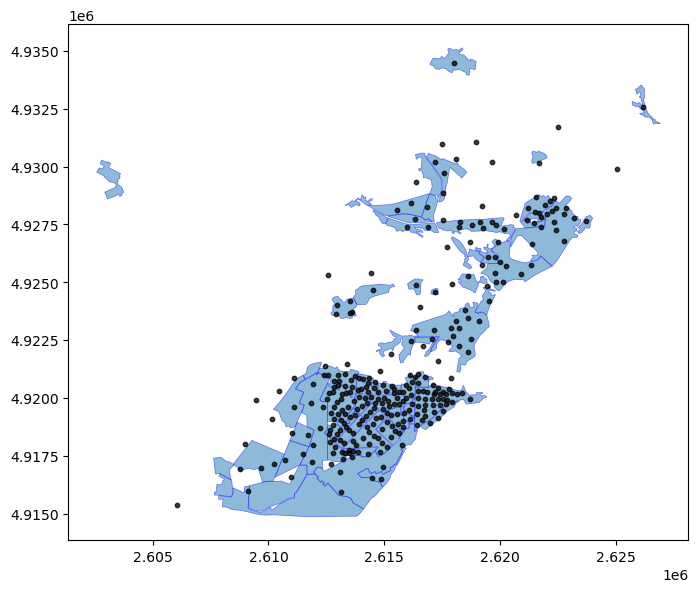

In [16]:
# plotear el gráfico con ambos geodataframe y edito features
axis = barrios["geometry"].plot(alpha = 0.5,
                               figsize = (8, 8),
                               edgecolor = "blue",
                               linewidth = 0.5)
radios["geometry"].plot(ax = axis,
                       color = "black",
                       alpha = 0.75,
                       markersize = 10)

In [17]:
# contar objetos dentro de la columna "nombre"
union_2["nombre_2"].count

# arroja 302 objetos

<bound method Series.count of 0                        Astra
1                    Don Bosco
2      Acceso Sur (Industrial)
3               Caleta Cordova
4            Dr. René Favaloro
                ...           
297    Acceso Sur (Industrial)
298          Parque Industrial
299               Stella Maris
300               Stella Maris
301             Standard Norte
Name: nombre_2, Length: 302, dtype: object>

C:\Users\UserMCR\AppData\Local\Temp\ipykernel_2792\1415353158.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


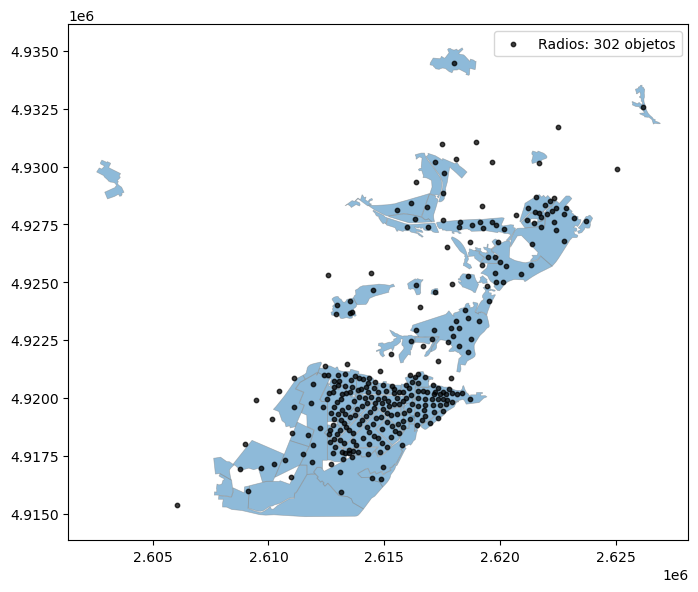

In [18]:
# plotear un gráfico de ambos geodataframe y editar features
# cada geodataframe tiene una etiqueta (label) indicando la preview del string

axis = barrios["geometry"].plot(alpha = 0.5,
                               figsize = (8, 8),
                               edgecolor = "grey",
                               linewidth = 0.5,
                               label =f"Barrios: {len(barrios)} objetos")
radios["geometry"].plot(ax = axis,
                       color = "black",
                       alpha = 0.75,
                       markersize = 10,
                       label = f"Radios: {len(radios)} objetos")
plt.legend()
plt.show()

In [19]:
# agrupar por "nombre_2" y sumar los valores de población

union2_pob = union_2.groupby("nombre_2")["pob2022"].agg(["sum"])
union2_pob.sum()

# arroja 200.333 habitantes entre todos los radios
# este agrupamiento queda con memoria para el resto del archivo, por lo que después debo re-cargar el archivo principal

sum    200333.0
dtype: float64

In [20]:
# reviso las columnas

union_2.head(2)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,nombre_2,zona,geometry,centroid
0,1.983407e+06,9684.930,26,021,07,01,U,260210701,329.0,123.0,None,Astra,Norte,"POLYGON ((2616543.465 4934097.157, 2616540.215...",POINT (2618029.576 4934459.579)
1,3.937995e+07,46229.258,26,021,09,01,M,260210901,294.0,132.0,None,Don Bosco,Norte,"POLYGON ((2619367.965 4934195.657, 2622752.465...",POINT (2622497.820 4931709.029)


<Axes: >

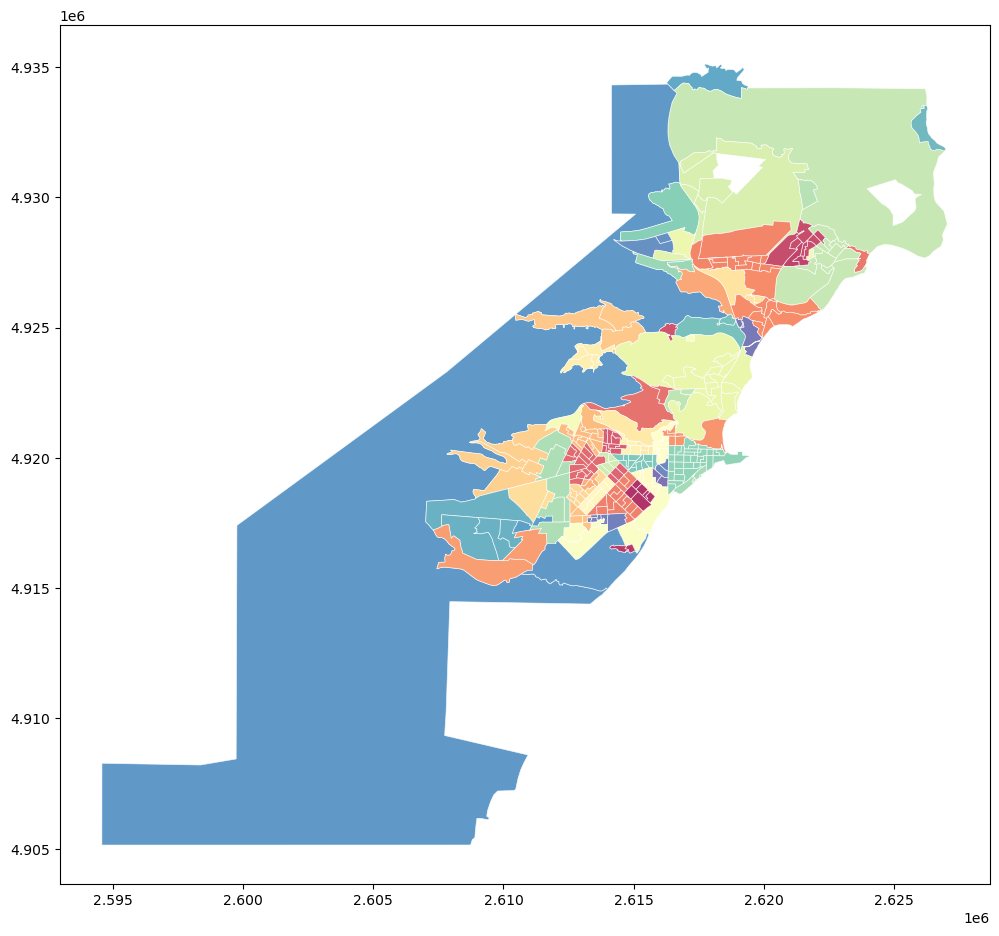

In [21]:
# hago un pre-ploteo para el intento de etiquetado

union_2.plot("nombre_2",
             figsize = (12, 12),
             linewidth = 0.5,
             edgecolor = "white",
             cmap = "Spectral_r",
             alpha = 0.8,
             )

In [22]:
# creo un campo llamado "coords" donde alojo un centroide (punto representativo)
# del centro de cada polígono según "nombre_2" (nombre de cada barrio)

union_2["coords"] = union_2["geometry"].apply(lambda x: x.representative_point().coords[:])
union_2["coords"] = [coords[0] for coords in union_2["coords"]]

In [23]:
# imprimo la tabla y veo que se agregó

union_2.head(1)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,nombre_2,zona,geometry,centroid,coords
0,1.983407e+06,9684.93,26,021,07,01,U,260210701,329.0,123.0,None,Astra,Norte,"POLYGON ((2616543.465 4934097.157, 2616540.215...",POINT (2618029.576 4934459.579),"(2617723.2214354337, 4934455.407182988)"


0          Annotation(2.61803e+06, 4.93446e+06, 'Astra')
1       Annotation(2.6225e+06, 4.93171e+06, 'Don Bosco')
2      Annotation(2.60603e+06, 4.91538e+06, 'Acceso S...
3      Annotation(2.62616e+06, 4.93258e+06, 'Caleta C...
4      Annotation(2.61964e+06, 4.9302e+06, 'Dr. René ...
                             ...                        
297    Annotation(2.61315e+06, 4.91594e+06, 'Acceso S...
298    Annotation(2.61098e+06, 4.9166e+06, 'Parque In...
299    Annotation(2.61487e+06, 4.91652e+06, 'Stella M...
300    Annotation(2.61446e+06, 4.91653e+06, 'Stella M...
301    Annotation(2.62171e+06, 4.928e+06, 'Standard N...
Length: 302, dtype: object

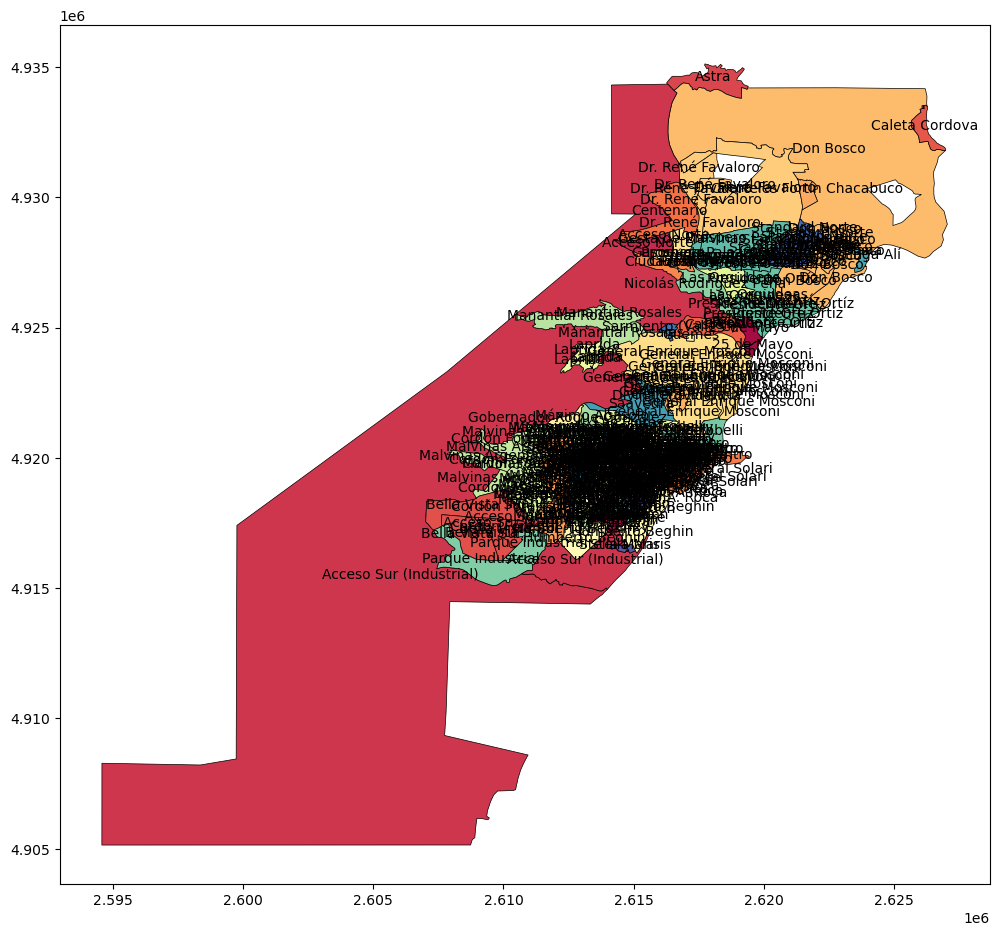

In [29]:
# ploteo los gdf con ambos ejes
# primer ejemplo de etiquetas en barrios

ax = union_2.plot("nombre_2",
                  figsize = (12, 12),
                  markersize = 5,
                  edgecolor = "black",
                  linewidth = 0.5,
                  cmap = "Spectral")
union_2.apply(lambda x: ax.annotate(text=x['nombre_2'],
                               xy = x.geometry.centroid.coords[0],
                               ha = 'center'),
                                axis = 1)

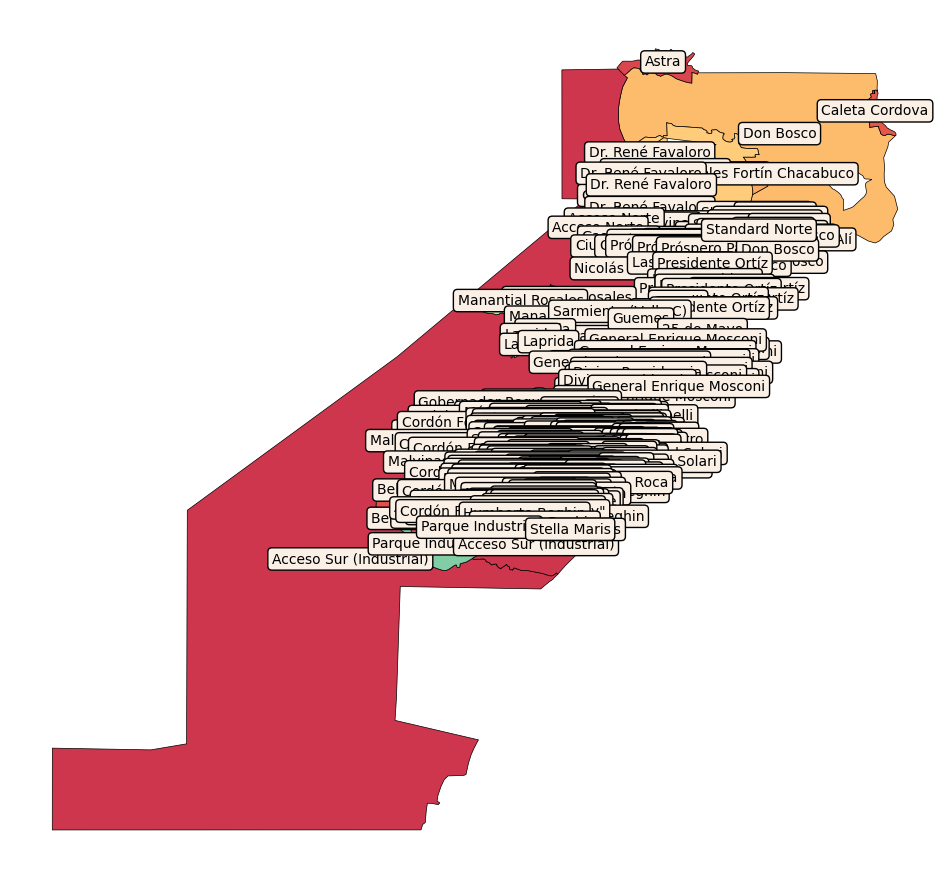

In [30]:
# ploteo los gdf con ambos ejes
# segundo ejemplo de etiquetas en barrios

ax = union_2.plot("nombre_2",
                  figsize = (12, 12),
                  markersize = 5,
                  edgecolor = "black",
                  linewidth = 0.5,
                  cmap = "Spectral")

props = dict(boxstyle = "round",
             facecolor = "linen",
             alpha = 1)
for point in union_2.iterrows():
    ax.text(point[1]["centroid"].x,
            point[1]["centroid"].y,
            point[1]["nombre_2"],
            horizontalalignment = "center",
            fontsize = 10,
            bbox = props)
    ax.axis("off")


#### R-tree Spatial Indexing with Python

Practicamos la indexación espacial de  [Geoff Boeing](https://geoffboeing.com/2016/10/r-tree-spatial-index-python/) usando GeoPandas. En este caso vamos a usar los geodataframes que venimos usando en este archivo.

In [ ]:
spatial_index = barrios.sindex
possible_matches_index = list(spatial_index.intersection(radios.bounds))
possible_matches = barrios.iloc[possible_matches_index]
precise_matches = possible_matches[possible_matches.intersects(radios)]

TypeError: Invalid coordinates, must be iterable in format (minx, miny, maxx, maxy) (for bounds) or (x, y) (for points). Got `coordinates` =              minx          miny          maxx          maxy
0    2.618030e+06  4.934460e+06  2.618030e+06  4.934460e+06
1    2.622498e+06  4.931709e+06  2.622498e+06  4.931709e+06
2    2.606026e+06  4.915385e+06  2.606026e+06  4.915385e+06
3    2.626163e+06  4.932583e+06  2.626163e+06  4.932583e+06
4    2.619639e+06  4.930199e+06  2.619639e+06  4.930199e+06
..            ...           ...           ...           ...
297  2.613153e+06  4.915941e+06  2.613153e+06  4.915941e+06
298  2.610982e+06  4.916605e+06  2.610982e+06  4.916605e+06
299  2.614872e+06  4.916518e+06  2.614872e+06  4.916518e+06
300  2.614464e+06  4.916527e+06  2.614464e+06  4.916527e+06
301  2.621707e+06  4.928003e+06  2.621707e+06  4.928003e+06

[302 rows x 4 columns].